# Assignment 2

## Part 1: Synthetic dataset

**Question 1** Start by generating a 2D dataset that has 3 Gaussian clusters. The first two should be as in the cluster creation exercise from class, i.e., cluster 1 should be centred at (10,10) and be spherical and cluster 2 should be centred at (0,0) and have contours in the shape of an ellipse (with a radius ratio of roughly 4:1), while the third cluster can be whatever you'd like as long as it is distinct from the first two but still has some overlap with one of them. Include a 1000 datapoints for each cluster.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random 
from collections import Counter

In [10]:
cluster1_x = []
cluster1_y = []

cluster2_x = []
cluster2_y = []

cluster3_x = []
cluster3_y = []

#spherical cluster data - cluster 1
#centered around (10,10)
#radius ration 1:1
cluster1_x.append(np.random.normal(10,1,1000))
cluster1_y.append(np.random.normal(10,1,1000))

#ellipse shaped cluster - cluster 2
#centered around (0,0)
#radius ration 4:1
cluster2_x.append(np.random.normal(0,4,1000))
cluster2_y.append(np.random.normal(0,1,1000))

#ellipse shaped data overlaping on 2nd cluster and also it's tilt - cluster 3
#centered around (-2,-3)
#radius ratio 1:1
cluster3_x.append(np.random.normal(5,4,1000))
cluster3_y.append(np.random.normal(5,1,1000))

#cluster3 tilt and overlaping on cluster 2
cluster3_data = np.array([cluster3_x[0], cluster3_y[0]]).transpose()
cluster3_data = cluster3_data.dot(np.array([[0.7, 0.5], [1.8, 0.5]])).transpose()


**Question 2** Produce a scatter plot of your clusters, assigning each cluster a different color.

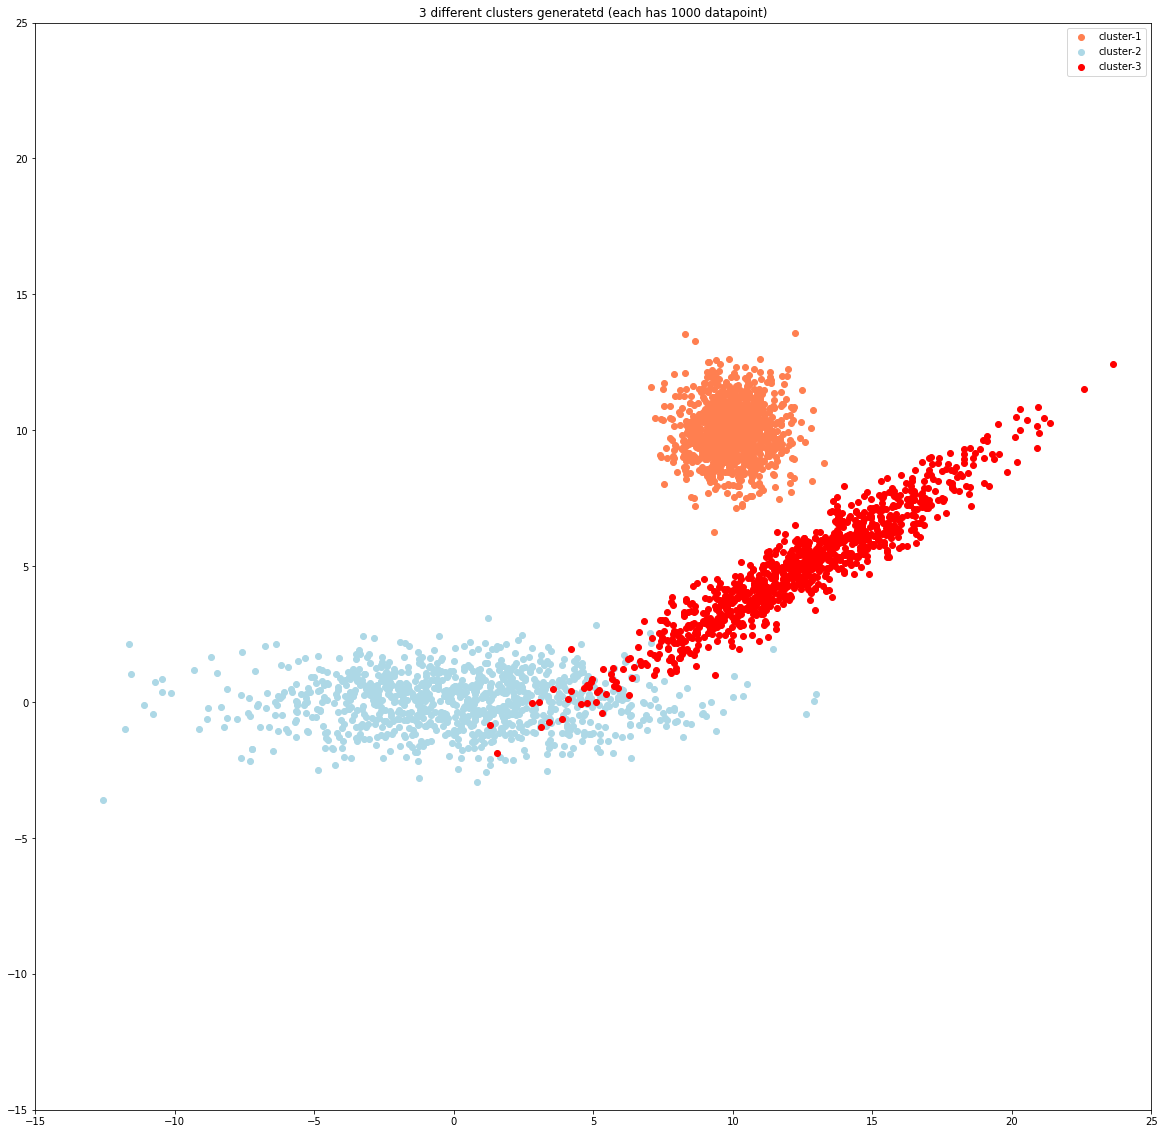

In [12]:
# ploting all of this figgures combined in a figure
plt.figure(figsize=(20,20))
plt.scatter(cluster1_x, cluster1_y, c = "coral", label = "cluster-1")
plt.scatter(cluster2_x, cluster2_y, c = "lightblue", label = "cluster-2")
plt.scatter(cluster3_data[0], cluster3_data[1], c = "red", label = "cluster-3")
plt.title("3 different clusters generatetd (each has 1000 datapoint)")
plt.xlim(-15, 25)
plt.ylim(-15, 25)
plt.legend()
plt.show()

## Part 2: Clustering

Suppose you didn't know to which cluster each datapoint belonged to, and wanted to find out. One of the first things you might try is the following algorithm, where $k$ is a hyperparameters controlling the number of clusters we're trying to find:

1. Initialize the k cluster centroids, $\mu_1, \mu_2, \ldots, \mu_k$, randomly.
2. Repeat until convergence **(Question 1: what should the convergence criterion be?)**:
    1. Assign each datapoint to the cluster with the nearest centroid;
    2. Re-calculate the cluster centroids, i.e. the mean of all datapoints assigned to each cluster

**Question 1: What should be the convergence criterion be?**

There could be n number of convergence criterions, I feel it also depends upon how the data is scattered over the space. 

  1. a simple approach could be to fix the number of iterations for recalculation of cluster centroids. But this approch might not be a good solutions as in some cases the model might need to do more iterations then provided, or in other cases there could be no need of extra iterations.

  2. better solution could be to check wether the new calculated centroids has changed it's position from the previous state or not. Even better solution would be to add a threshold for the change of state of centroids. For example, if the change is of < 3%, we can call it end of training.

MyApproach:  if the previous centorids's are not moving and difference between previous and current centroids is ZERO. However in the Clustering class implementation I will try to add maximum iteration creterion on top of this as well.



In [22]:
k = 2
color = ["#ff675c","#48b7db","#8DE022","#2243E0","#22E0B5"]

In [23]:
demo_x = np.random.normal(0,1,1000)
demo_y1 = np.random.normal(1,1,500)
demo_y2 = np.random.normal(1,2,500)
demo_y = np.concatenate((demo_y1,demo_y2), axis=0)

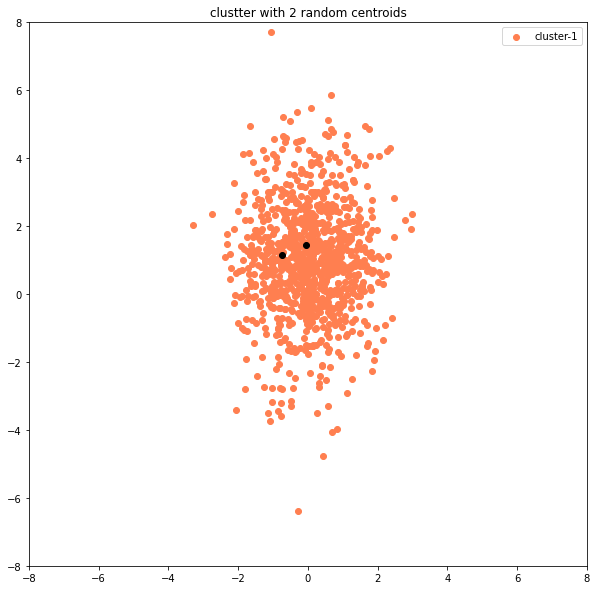

In [24]:
current_centroid_index = np.random.randint(1,1000,(1,k))

plt.figure(figsize=(10,10))
plt.scatter(demo_x, demo_y, c = "coral", label = "cluster-1")
for i in range(k):
  plt.scatter(demo_x[current_centroid_index[0][i]], demo_y[current_centroid_index[0][i]], c="black")
plt.title("clustter with 2 random centroids")
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.legend()
plt.show()

In [25]:
allDistance = []
for point_x, point_y in zip(demo_x, demo_y):
  point = np.array((point_x, point_y))
  distance = []
  for centroid_index in current_centroid_index[0]:
      centroid = np.array((demo_x[centroid_index], demo_y[centroid_index]))
      distance.append(np.linalg.norm(point-centroid))
  allDistance.append(np.array(distance))

In [26]:
clusters = []

for index in range(len(allDistance)):
    belongsTo = np.where(allDistance[index] == np.amin(allDistance[index]))[0][0]
    clusters.append(belongsTo)

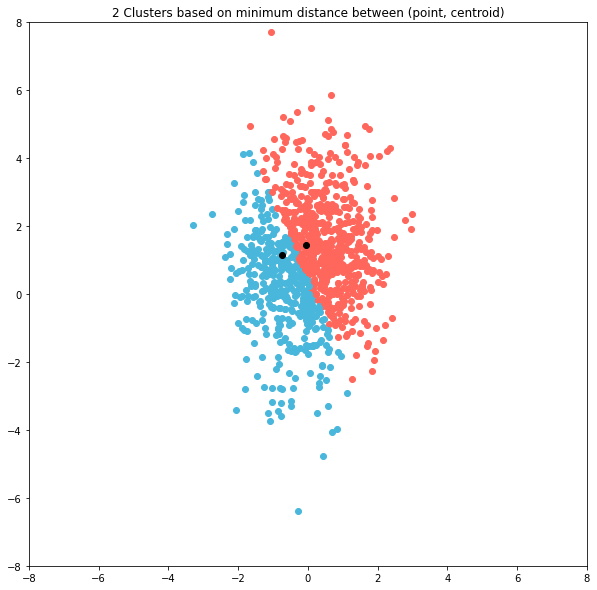

In [27]:
plt.figure(figsize=(10,10))
for index, (x,y) in enumerate(zip(demo_x, demo_y)):
    plt.scatter(x,y,c=color[clusters[index]])
for i in range(k):
  plt.scatter(demo_x[current_centroid_index[0][i]], demo_y[current_centroid_index[0][i]], c="black")

plt.title("2 Clusters based on minimum distance between (point, centroid)")
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()


In [28]:
previous_centroids = []
current_centroids = []

#randomly picked datapoints for previous_centroid
previoud_centroid_index = np.random.randint(1,1000,(1,k))
for tempcentorid in previoud_centroid_index[0]:
    previous_centroids.append([demo_x[tempcentorid],demo_y[tempcentorid]])

#picked datapoints for current_centroid
for tempcentorid in current_centroid_index[0]:
    current_centroids.append([demo_x[tempcentorid],demo_y[tempcentorid]])

In [29]:
#this method checks if passed centroid possitions are matching or not
def checkCentroids(previous_centroids, centroids):
    diff = 0
    for previoud_point, current_point in zip(previous_centroids[0], centroids[0]):
        diff += np.absolute(previoud_point-current_point)
    print("Difference with previous centroid:", diff)
    if(diff == 0):
      return False
    else:
      return True

Difference with previous centroid: 4.6298995722825165


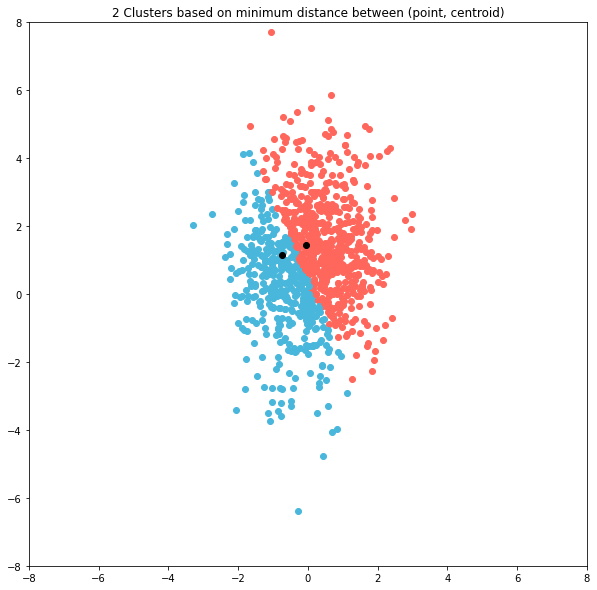

Difference with previous centroid: 0.7723340799491507


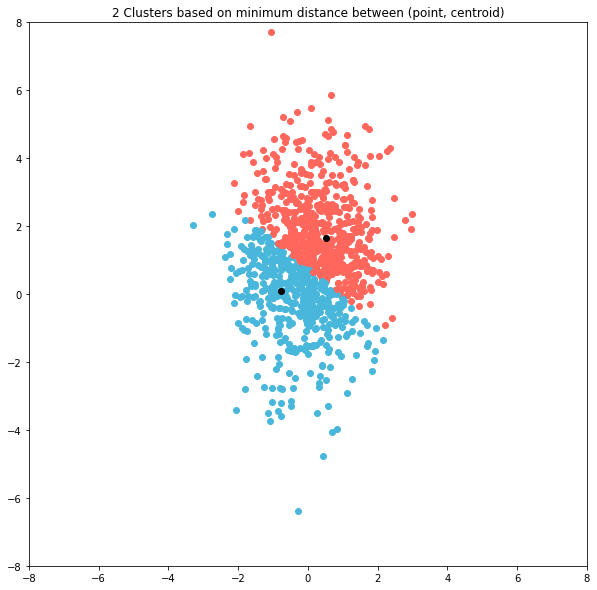

Difference with previous centroid: 0.5104933861051668


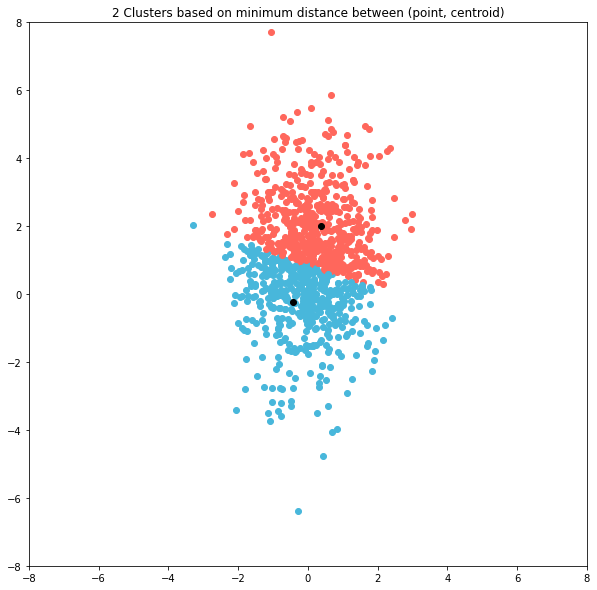

Difference with previous centroid: 0.2712893383257849


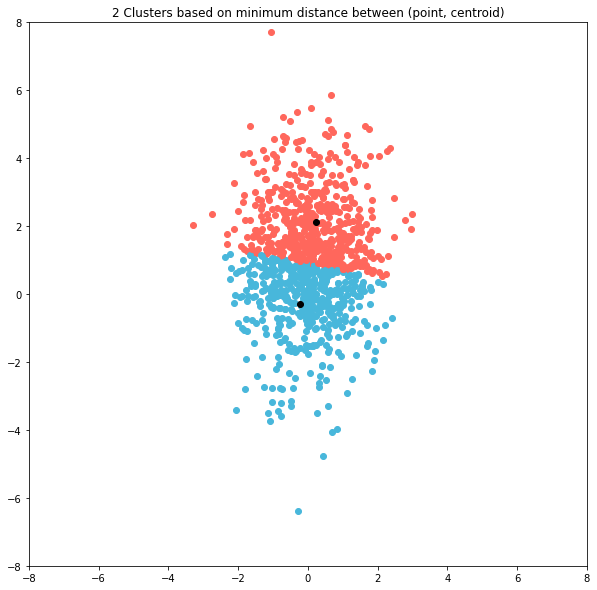

Difference with previous centroid: 0.12353981971191827


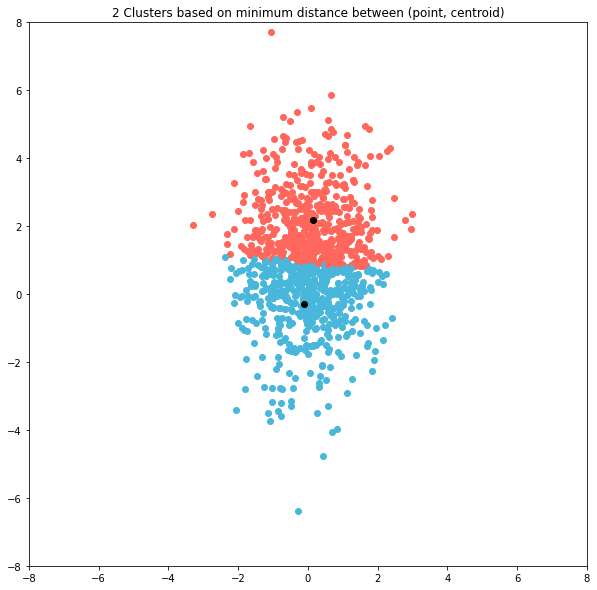

Difference with previous centroid: 0.09801212185636482


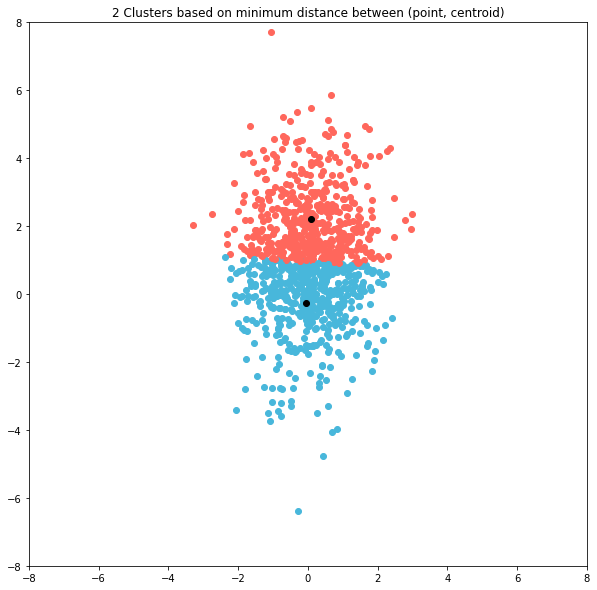

Difference with previous centroid: 0.06925241810644896


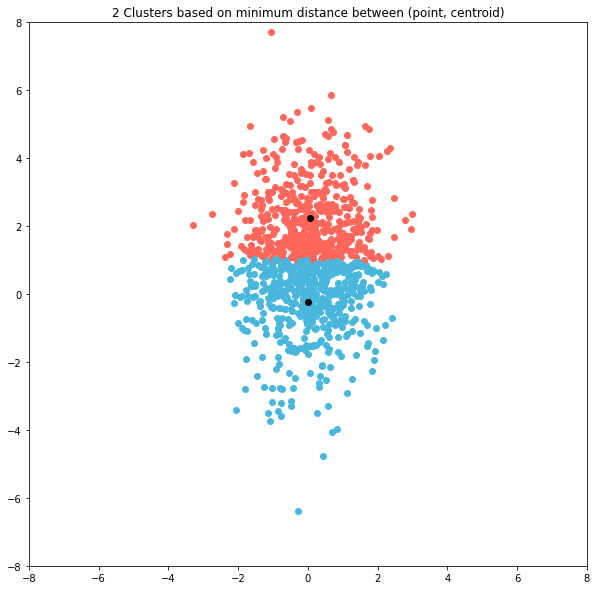

Difference with previous centroid: 0.06245706854683838


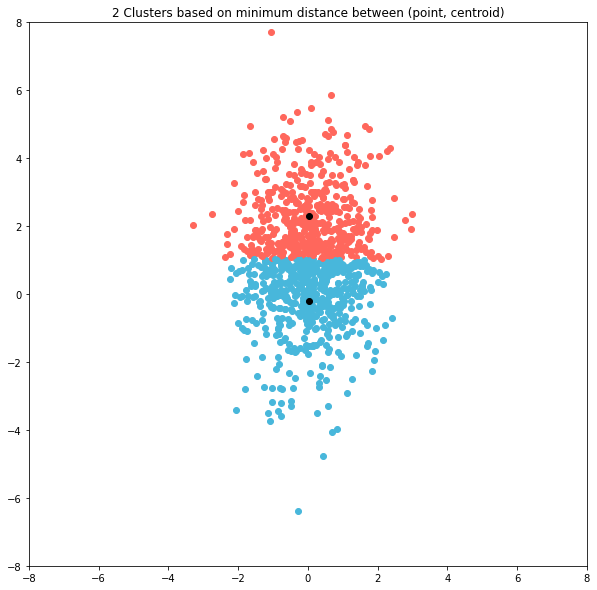

Difference with previous centroid: 0.02457050192726458


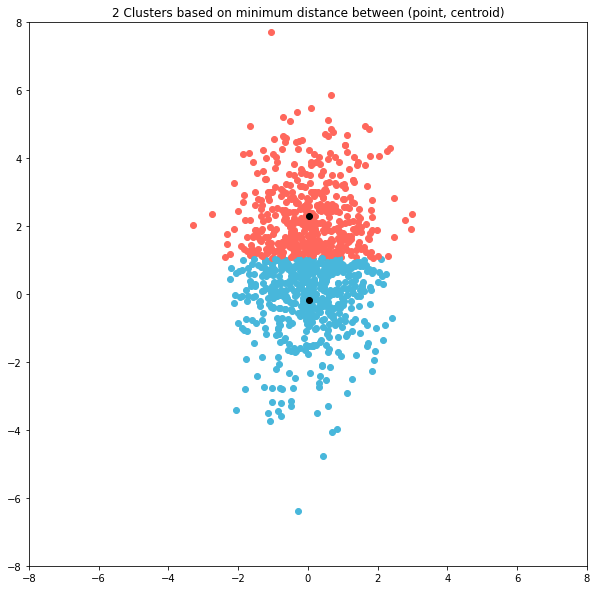

Difference with previous centroid: 0.01774048150060479


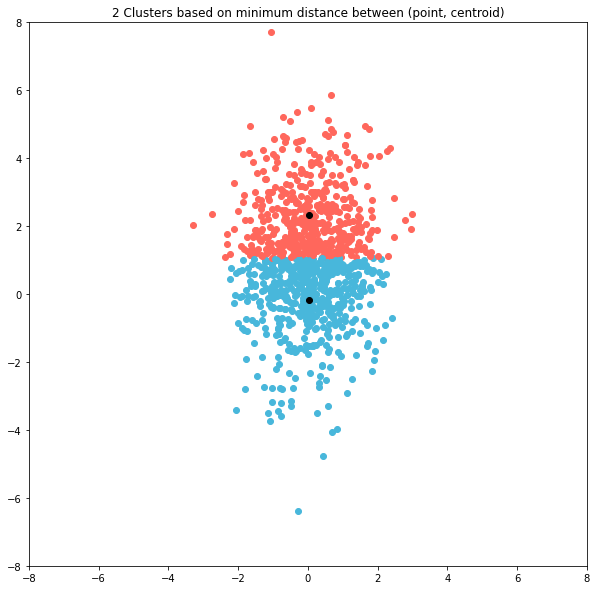

Difference with previous centroid: 0.006323618518969048


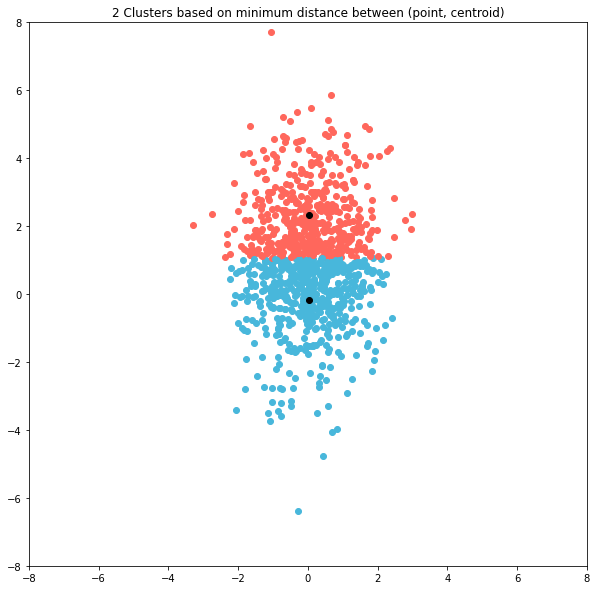

Difference with previous centroid: 0.0


In [30]:
#this code block does following thing
#1. calculates distance of each datapoint with respect to all the centroids
#2. calculates to which cluster the given datapoint is belonging to
#3. plots figures to get idea about how the centroids are changing over the convergence
#4. sets current centroids as previous centroids
#5. calculates new centroids based on mean value of the datapoints for that particular cluster
#6. sets new calculated centroids as previous centroids

while(checkCentroids(previous_centroids, current_centroids)):
      allDistance = []
      clusters = []

      # 1
      for point_x, point_y in zip(demo_x, demo_y):
        point = np.array((point_x, point_y))
        distance = []
        for centroid in current_centroids:
            distance.append(np.linalg.norm(point-centroid))
        allDistance.append(np.array(distance))

      # 2
      for index in range(len(allDistance)):
          belongsTo = np.where(allDistance[index] == np.amin(allDistance[index]))[0][0]
          clusters.append(belongsTo)

      # 3
      plt.figure(figsize=(10,10))
      for index, (x,y) in enumerate(zip(demo_x, demo_y)):
          plt.scatter(x,y,c=color[clusters[index]])
      for centroid in current_centroids:
        plt.scatter(centroid[0], centroid[1], c="black")

      plt.title("2 Clusters based on minimum distance between (point, centroid)")
      plt.xlim(-8, 8)
      plt.ylim(-8, 8)
      plt.show()

      # 4
      previous_centroids = current_centroids

      # 5 
      new_centroids = []
      for i in range(k):
          current_cluster_index = np.where(np.array(clusters) == i)[0]
          x_min = demo_x[current_cluster_index].sum()/len(current_cluster_index)
          y_min = demo_y[current_cluster_index].sum()/len(current_cluster_index)
          new_centroids.append(np.array([x_min,y_min]))

      #6
      current_centroids = new_centroids

      

**Question 2**: Implement this in Python. Define a Python class $\it{clustering}$, that takes as initialization parameters $\it{n_{clusters}}$, the number of clusters, $\it{n_{iter}}$, the maximum number of iterations of the above algorithm, and any other parameters you feel are needed to check for convergence (if any). The cluster centroids should be a class attribute. Define two methods, $\it{fit}$, taking in a set of points, $\mathbf{X}$ and performing clustering using the algorithm above,  and $\it{predict}$, that takes in a set of points and returns a prediction for which cluster those points belong to.

In [40]:
#k is the number of clusters
#n is the number of iterations
class Clustering:
    def __init__(self, k, n):
      self.k = k
      self.maxIterations = n
      self.__centroids = 0
      self.previous_centroids = []
      self.current_centroids = []


    def __checkCentroids(self, previous_centroids, centroids):
        diff = 0
        for previoud_point, current_point in zip(previous_centroids[0], centroids[0]):
            diff += np.absolute(previoud_point-current_point)
        if(diff == 0):
          return False
        else:
          return True

    def __initializeCentroids(self, X):
        #randomly picked datapoints for previous_centroid
        previoud_centroid_index = np.random.randint(0, len(X[0]), (1,self.k))
        for tempcentorid in previoud_centroid_index[0]:
            self.previous_centroids.append(np.array([X[0][tempcentorid], X[1][tempcentorid]]))

        #picked datapoints for current_centroid
        current_centroid_index = np.random.randint(0, len(X[0]), (1,self.k))
        for tempcentorid in current_centroid_index[0]:
            self.current_centroids.append(np.array([X[0][tempcentorid], X[1][tempcentorid]]))   

    def fit(self, X):
      iterations = 0

      self.__initializeCentroids(X)

      while(iterations < self.maxIterations and self.__checkCentroids(self.previous_centroids, self.current_centroids)):
            allDistance = []
            clusters = []

            # 1
            for point_x, point_y in zip(X[0], X[1]):
              point = np.array((point_x, point_y))
              distance = []
              for centroid in self.current_centroids:
                  distance.append(np.linalg.norm(point-centroid))
              allDistance.append(np.array(distance))

            # 2
            for index in range(len(allDistance)):
                belongsTo = np.where(allDistance[index] == np.amin(allDistance[index]))[0][0]
                clusters.append(belongsTo)
            

            # 3 this block is just for visualization
            plt.figure(figsize=(10,10))
            for index, (x,y) in enumerate(zip(X[0], X[1])):
                plt.scatter(x,y,c=color[clusters[index]])
            for centroid in self.current_centroids:
                plt.scatter(centroid[0], centroid[1], c="black")

            plt.xlim(-15, 25)
            plt.ylim(-15, 25)
            plt.savefig("/content/sample_data/Iterations/"+str(iterations)+".jpg")

            # 4
            self.previous_centroids = self.current_centroids

            # 5 
            new_centroids = []
            for i in range(self.k):
                current_cluster_index = np.where(np.array(clusters) == i)[0]
                x_min = X[0][current_cluster_index].sum()/len(current_cluster_index)
                y_min = X[1][current_cluster_index].sum()/len(current_cluster_index)
                new_centroids.append(np.array([x_min,y_min]))


            #6
            self.current_centroids = new_centroids

            iterations+=1

    def predict(self, x):
        distance = []
        for centroid in self.current_centroids:
            distance.append(np.linalg.norm(x-centroid))
        return distance.index(min(distance))+1



**Question 3**: Use your clustering class on the synthetic dataset you created in Part 1. Comment on how well it clusters your dataset. 

In [41]:
X = {}

In [42]:
X[0] = np.concatenate((np.array(cluster1_x[0]), np.array(cluster2_x[0]), cluster3_data[0]))
X[1] = np.concatenate((np.array(cluster1_y[0]), np.array(cluster2_y[0]), cluster3_data[1]))

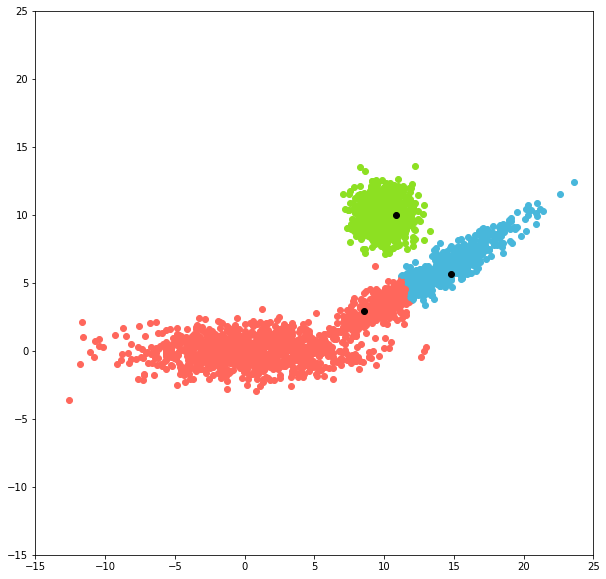

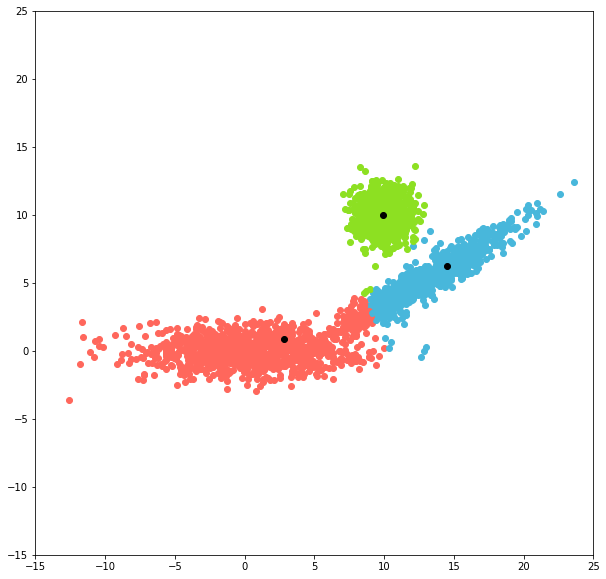

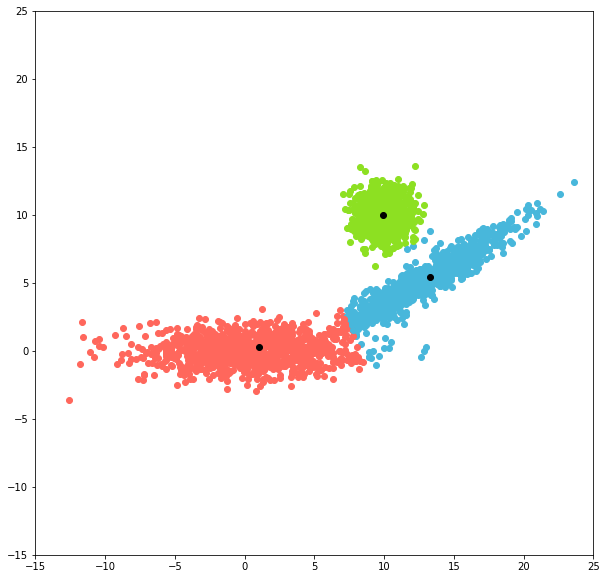

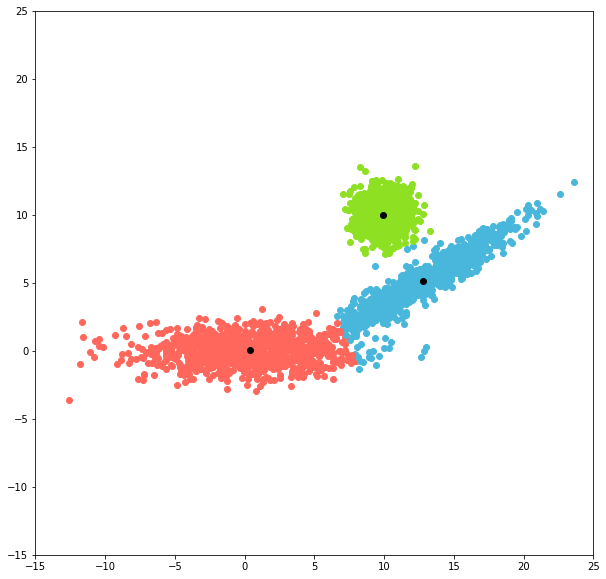

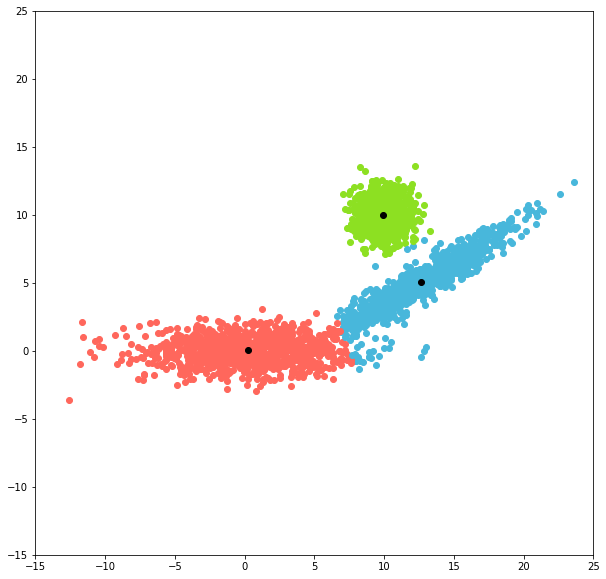

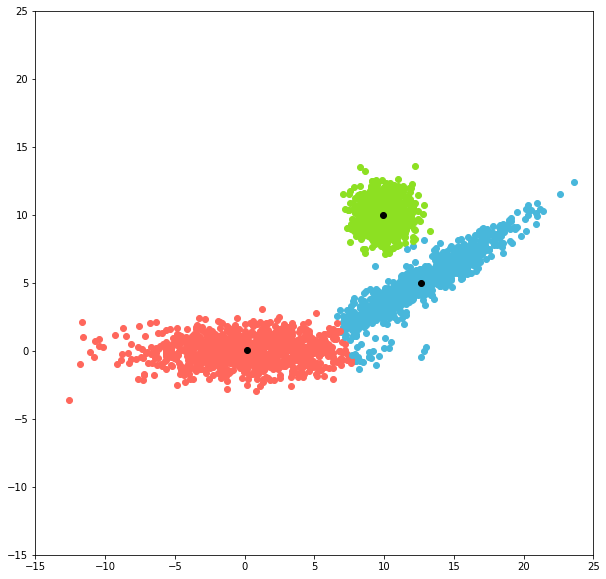

In [43]:
#training for the 1st time
model = Clustering(3, 100)
model.fit(X)

In [60]:
prediction1 = model.predict(np.array((0,-9)))
print("For point (0,-9) our model predicted that it belongs to cluster-"+str(prediction1))
prediction2 = model.predict(np.array((10,9)))
print("For point (10,9) our model predicted that it belongs to cluster-"+str(prediction2))
prediction3 = model.predict(np.array((20,10)))
print("For point (20,10) our model predicted that it belongs to cluster-"+str(prediction3))

For point (0,-9) our model predicted that it belongs to cluster-1
For point (10,9) our model predicted that it belongs to cluster-3
For point (20,10) our model predicted that it belongs to cluster-2


**Question 4**: How do the found clusters vary as you run the algorithm again?

I think the number of iterations depend upon the randomly initialized value of centroids. Although, the end results/clusters are looking similar for all the 3 different trainigns that I did on the same data. 

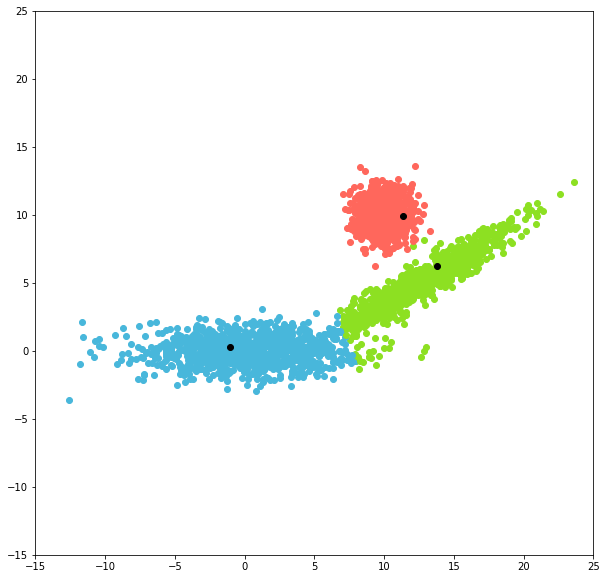

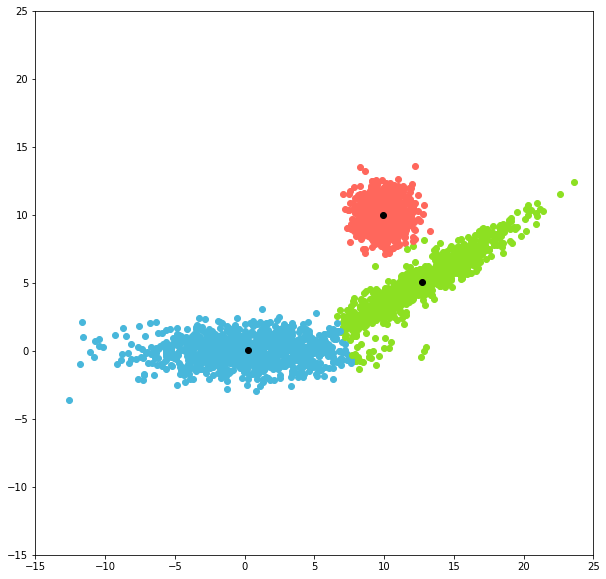

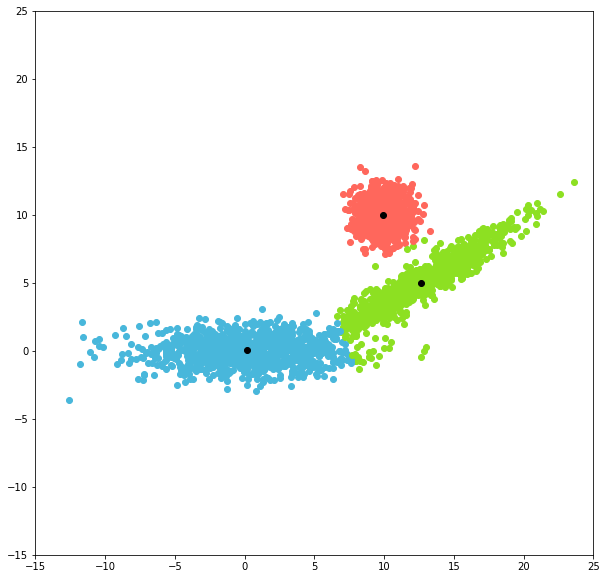

In [61]:
#training for the 2nd time
model = Clustering(3, 100)
model.fit(X)

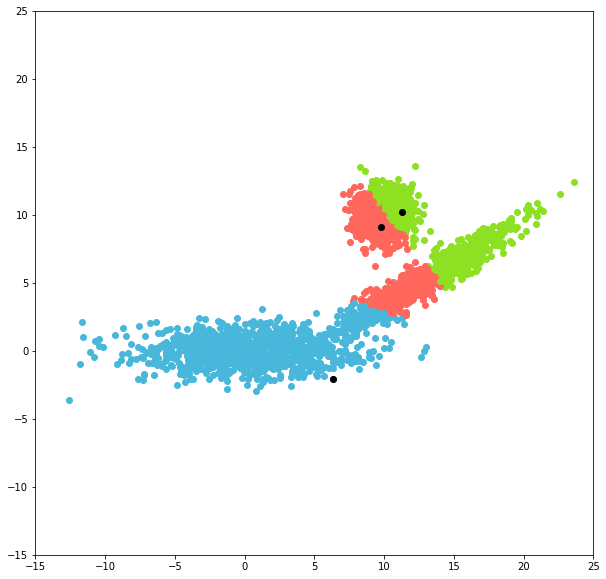

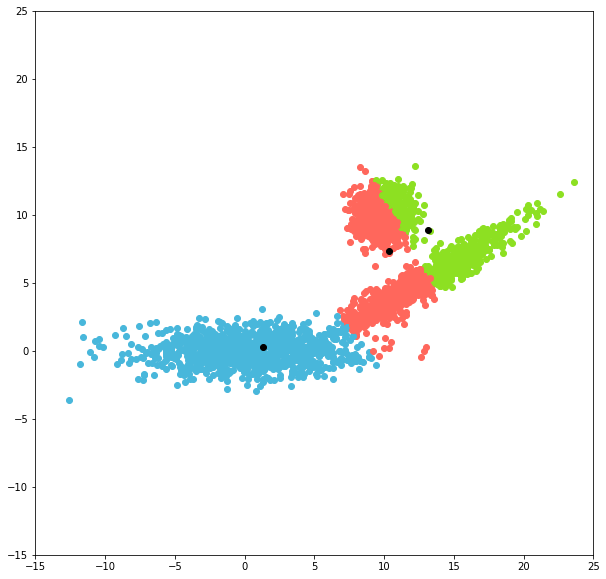

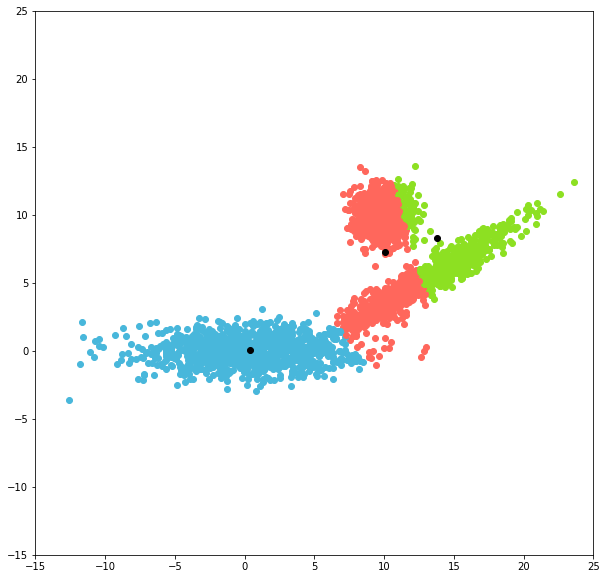

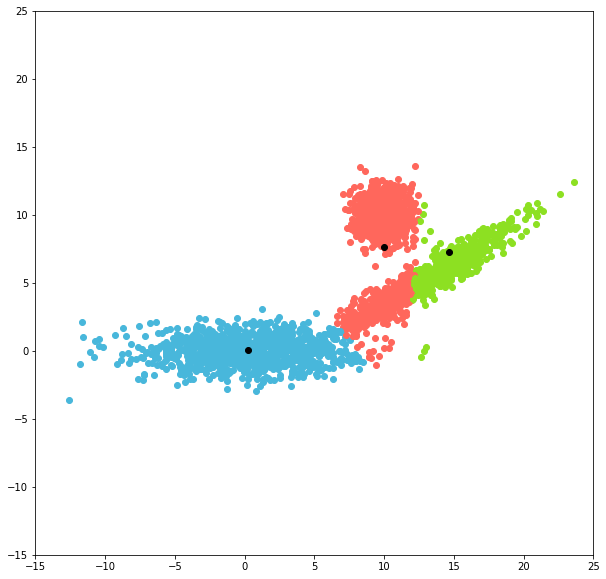

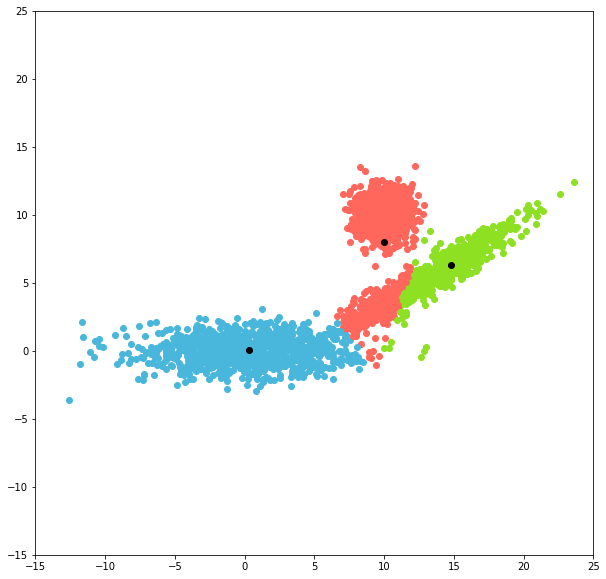

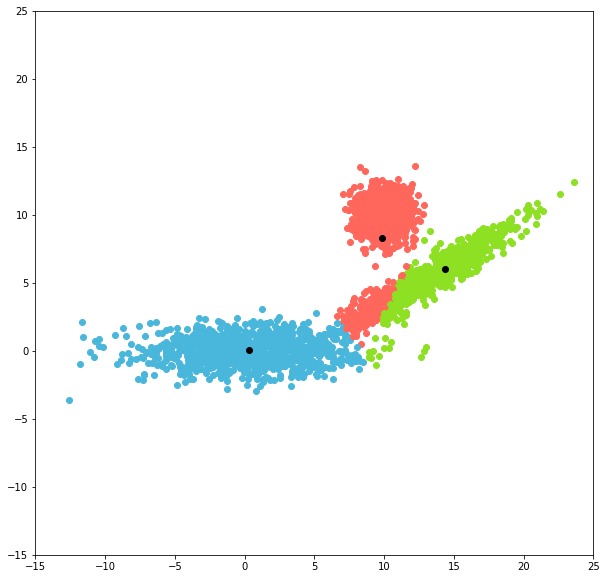

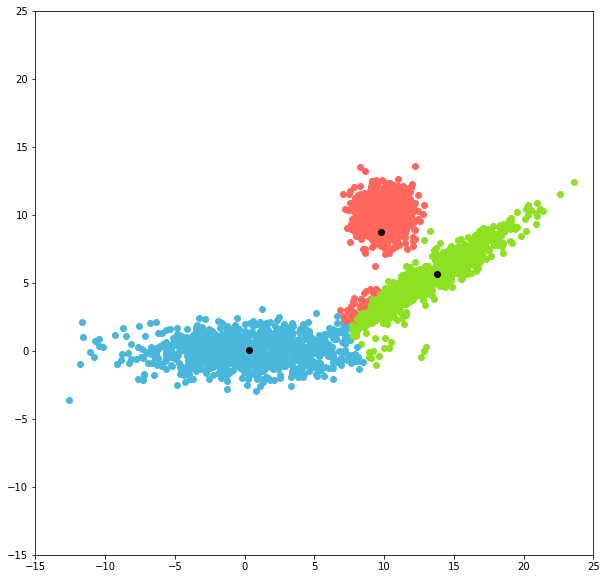

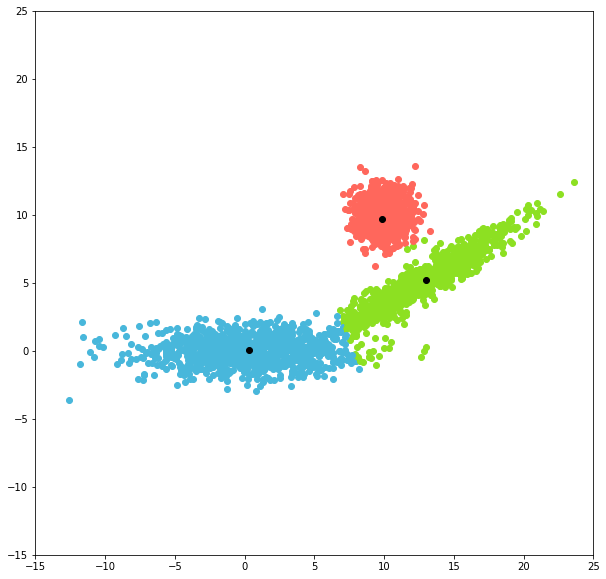

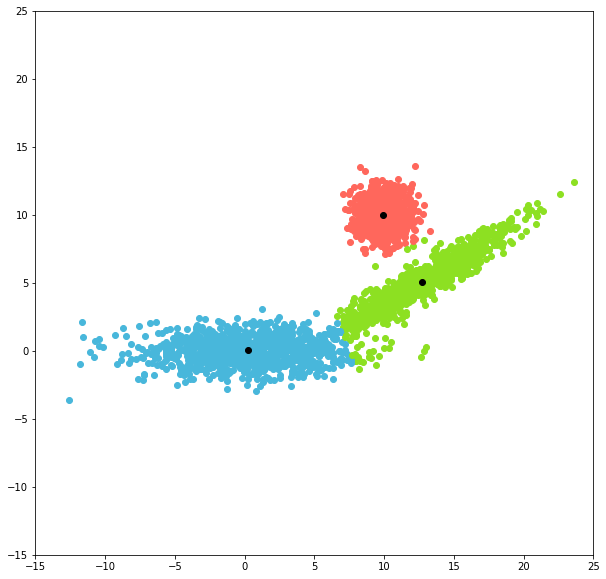

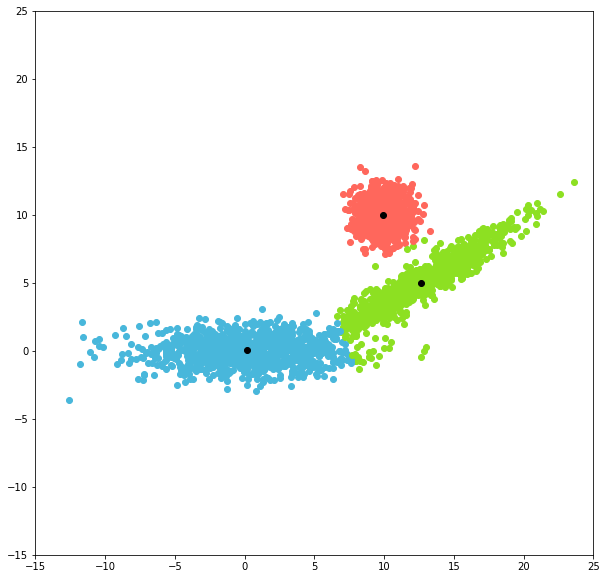

In [63]:
#training for the 3rd time
model = Clustering(3, 100)
model.fit(X)